In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import plotly as ply
import seaborn as sns

In [10]:
pd.set_option('display.max_rows',400)

In [2]:
pathMain = 'API_19_DS2_en_excel_v2_6002116.xls'
pathGDP =  "API_NY.GDP.MKTP.CD_DS2_en_excel_v2_5994847.xls"
pathGDPcap = "API_NY.GDP.PCAP.CD_DS2_en_excel_v2_5994922.xls"

In [3]:
def dataInitialize(mainData,GDPdir,GDPCapDir): 


    dfData = pd.read_excel(mainData, header=3)
    dfGDP = pd.read_excel(GDPdir, header=3)
    dfGDPcap = pd.read_excel(GDPCapDir, header=3)
    dfCountryMetaData = pd.read_excel(mainData, sheet_name= 'Metadata - Countries')
    dfIndicatorMetaData = pd.read_excel(mainData, sheet_name= 'Metadata - Indicators')


    dfDataMerged = pd.merge(dfData, dfCountryMetaData, on='Country Code', how='inner')
    dfDataMerged = pd.concat([dfDataMerged,dfGDP,dfGDPcap],axis=0).sort_values(by='Country Name', ascending=True)
    dfDataMerged = dfDataMerged.reset_index()


    region_list={}
    income_list={}
    for i in dfCountryMetaData['TableName'].unique():
        region_list[i] = dfCountryMetaData[dfCountryMetaData['TableName']==i]['Region'].unique()[0]
        income_list[i] = dfCountryMetaData[dfCountryMetaData['TableName']==i]['IncomeGroup'].unique()[0]

    for i,j in region_list.items():
        dfDataMerged.loc[dfDataMerged['Country Name'] == i,'Region'] = j
        dfDataMerged.loc[dfDataMerged['Country Name'] == i,'IncomeGroup'] = j



    columnslist = dfDataMerged.columns.tolist()
    columnslist.insert(4,columnslist.pop(dfDataMerged.columns.get_loc('Region')))
    columnslist.insert(5,columnslist.pop(dfDataMerged.columns.get_loc('IncomeGroup')))
    dfDataMerged = dfDataMerged[columnslist]
    dfDataMerged = dfDataMerged.drop(columns=['SpecialNotes', 'TableName','index'], axis=1)



    dfCountry = dfDataMerged.set_index(['Country Name','Country Code','Region','IncomeGroup','Indicator Code','Indicator Name'])

    dfCountry = dfCountry[dfCountry.index.get_level_values('Indicator Code').isin(['SP.POP.TOTL','SP.POP.GROW','SP.URB.TOTL.IN.ZS','NV.AGR.TOTL.ZS','EN.ATM.GHGT.ZG','EN.ATM.GHGT.KT.CE','EG.USE.PCAP.KG.OE','EG.USE.ELEC.KH.PC','EG.ELC.PETR.ZS','EG.ELC.NGAS.ZS','EG.ELC.COAL.ZS','EG.ELC.ACCS.ZS','AG.LND.FRST.ZS','AG.LND.FRST.K2','AG.LND.AGRI.ZS','NY.GDP.MKTP.CD','NY.GDP.PCAP.CD'])]
    dfCountry = dfCountry[dfCountry.index.get_level_values('Country Name').isin(['India','China','Bangladesh','Australia','New Zealand','Nigeria','Egypt, Arab Rep.','South Africa','Brazil','Colombia','Argentina','Canada','United States','Germany','Spain','Austria'])]


    dfYear = dfCountry.T
    
    return dfCountry,dfYear

In [6]:
dfCountry, dfYear = dataInitialize(pathMain,pathGDP,pathGDPcap)

In [40]:
rowLabels =  pd.IndexSlice[:,:,:,:,('NY.GDP.MKTP.CD'),:] 
dfTimeSeries = dfCountry.loc[rowLabels, :]

In [41]:
dfTimeSeries = dfTimeSeries.reset_index()

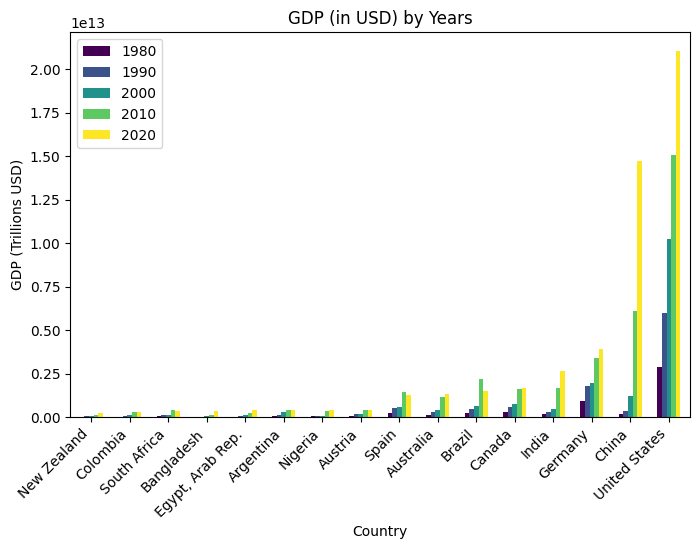

In [129]:

dfGDP = pd.melt(dfTimeSeries,id_vars=['Country Name','Indicator Name'],value_vars=[str(x) for x in range(1980,2021,10)])
dfGDP.pivot(index='Country Name',columns='variable',values='value').sort_values(by='2020',ascending=True).plot(kind='bar',width=0.6,figsize=(8,5),colormap='viridis' )

plt.xlabel('Country')
plt.ylabel('GDP (Trillions USD)')
plt.title('GDP (in USD) by Years')
plt.xticks(rotation=45, ha='right')

plt.legend()
# plt.grid(True)
plt.show()


In [106]:
  
dfPopulationTotal = dfCountry.loc[pd.IndexSlice[:,:,:,:,('SP.POP.TOTL'),:], :]
   
dfPopulationGrowth = dfCountry.loc[pd.IndexSlice[:,:,:,:,('SP.POP.GROW'),:], :]

dfUrbanPopulation = dfCountry.loc[pd.IndexSlice[:,:,:,:,('SP.URB.TOTL.IN.ZS'),:], :]

dfEnergy = dfCountry.loc[pd.IndexSlice[:,:,:,:,('EG.USE.ELEC.KH.PC'),:], :]

dfForestLand = dfCountry.loc[pd.IndexSlice[:,:,:,:,('AG.LND.FRST.K2'),:], :]  

dfgreenhouse = dfCountry.loc[pd.IndexSlice[:,:,:,:,('EN.ATM.GHGT.KT.CE'),:], :]  

dfenergyoil = dfCountry.loc[pd.IndexSlice[:,:,:,:,('EG.USE.PCAP.KG.OE'),:], :] 

dfelectricitycoal = dfCountry.loc[pd.IndexSlice[:,:,:,:,('EG.ELC.COAL.ZS'),:], :]

dfelectricityoil = dfCountry.loc[pd.IndexSlice[:,:,:,:,('EG.ELC.PETR.ZS'),:], :]

dfelectricitygas = dfCountry.loc[pd.IndexSlice[:,:,:,:,('EG.ELC.NGAS.ZS'),:], :]

dfagriculture = dfCountry.loc[pd.IndexSlice[:,:,:,:,('AG.LND.AGRI.ZS'),:], :]

dfagrforest = dfCountry.loc[pd.IndexSlice[:,:,:,:,('NV.AGR.TOTL.ZS'),:], :]

In [110]:
dfPopulationTotal = dfPopulationTotal.reset_index()
dfPopulationGrowth = dfPopulationGrowth.reset_index()
dfUrbanPopulation = dfUrbanPopulation.reset_index()
dfGDPCapita.reset_index(inplace=True)
dfEnergy.reset_index(inplace=True)
dfEnergySources.reset_index(inplace=True)
dfgreenhouse.reset_index(inplace=True)
dfForestLand.reset_index(inplace=True)
dfenergyoil.reset_index(inplace=True)
dfelectricitycoal.reset_index(inplace=True)
dfelectricityoil.reset_index(inplace=True)
dfelectricitygas.reset_index(inplace=True)
dfagriculture.reset_index(inplace=True)
dfagrforest.reset_index(inplace=True)

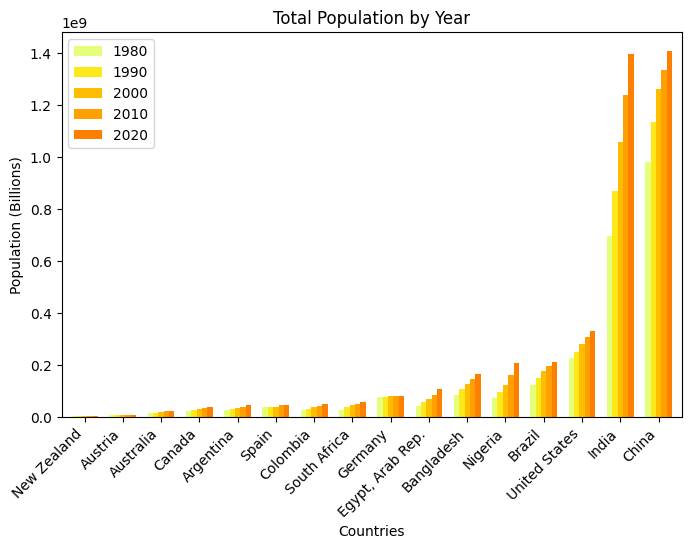

In [130]:

dfPopTotal = pd.melt(dfPopulationTotal,id_vars=['Country Name','Indicator Name'],value_vars=[str(x) for x in range(1980,2021,10)])

dfPopTotal.pivot(index=['Country Name'],columns='variable',values='value').sort_values(by='2020').plot(kind='bar',width=0.7,figsize=(8,5),colormap='Wistia')

plt.xlabel('Countries')
plt.ylabel('Population (Billions)')
plt.title('Total Population by Year')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()
# plt.savefig('tot-pop.png',bbox_inches ='tight')

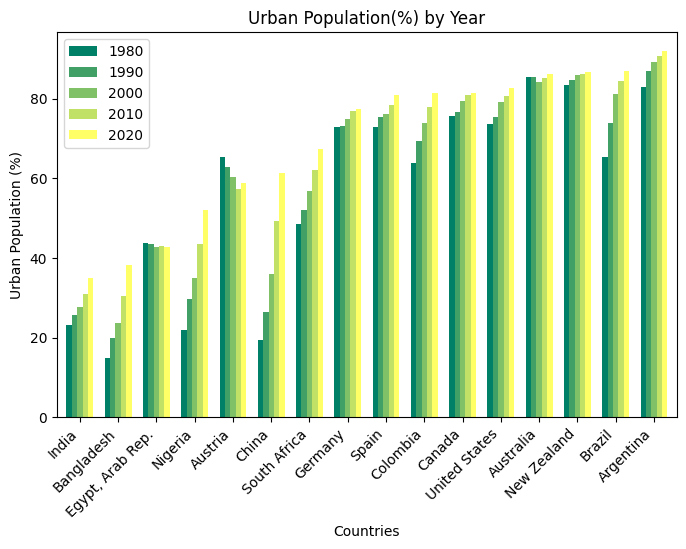

In [131]:
dfUrbPop = pd.melt(dfUrbanPopulation,id_vars=['Country Name','Indicator Name'],value_vars=[str(x) for x in range(1980,2021,10)])
UrbPopPivot = dfUrbPop.pivot_table(index='Country Name',columns='variable',values='value').sort_values(by='2020').plot(kind='bar',width=0.7,figsize=(8,5),colormap='summer')

plt.xlabel('Countries')
plt.ylabel('Urban Population (%)')
plt.title('Urban Population(%) by Year')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()
# plt.savefig('urban pop.png',bbox_inches='tight')

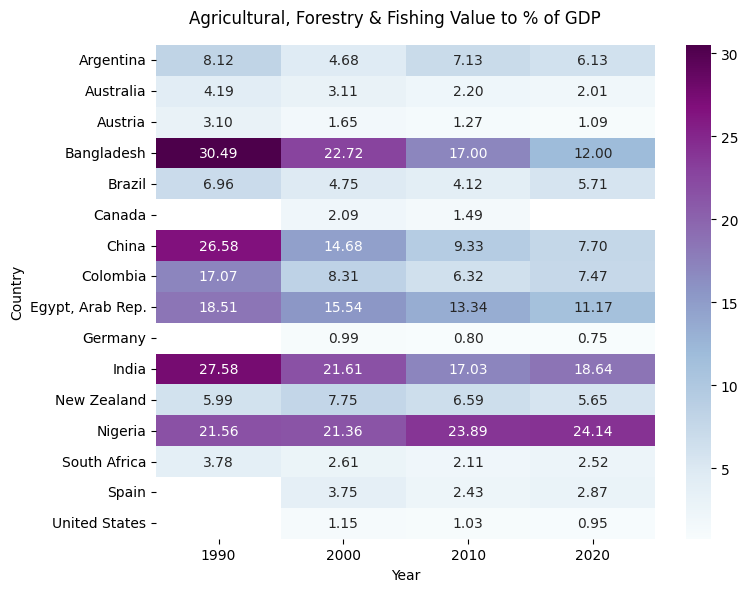

In [132]:
dfagrforest = pd.melt(dfagrforest,id_vars=['Country Name','Indicator Name'],value_vars=[str(x) for x in range(1990,2021,10)])
dfagrforestPivot = dfagrforest.pivot_table(index='Country Name',columns='variable',values='value')

fig, axs = plt.subplots(figsize=(8,6))
sns.heatmap(dfagrforestPivot, annot=True, fmt=".2f", cmap='BuPu')

plt.suptitle('Agricultural, Forestry & Fishing Value to % of GDP')
# axs.set_title('Heatmap')
axs.set_xlabel('Year')
axs.set_ylabel('Country')
plt.tight_layout()
# plt.savefig('agrforest.png',bbox_inches='tight')
plt.show()

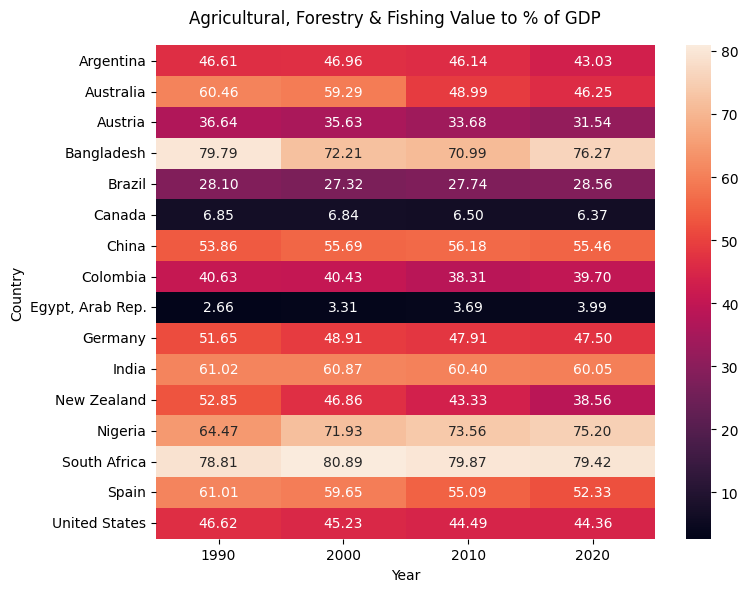

In [138]:
dfagriculture = pd.melt(dfagriculture,id_vars=['Country Name','Indicator Name'],value_vars=[str(x) for x in range(1990,2021,10)])
dfagriculturePivot = dfagriculture.pivot_table(index='Country Name',columns='variable',values='value')

fig, axs = plt.subplots(figsize=(8,6))
sns.heatmap(dfagriculturePivot, annot=True, fmt=".2f", )

plt.suptitle('Agricultural, Forestry & Fishing Value to % of GDP')
# axs.set_title('Heatmap')
axs.set_xlabel('Year')
axs.set_ylabel('Country')
plt.tight_layout()
# plt.savefig('agrforest.png',bbox_inches='tight')
plt.show()

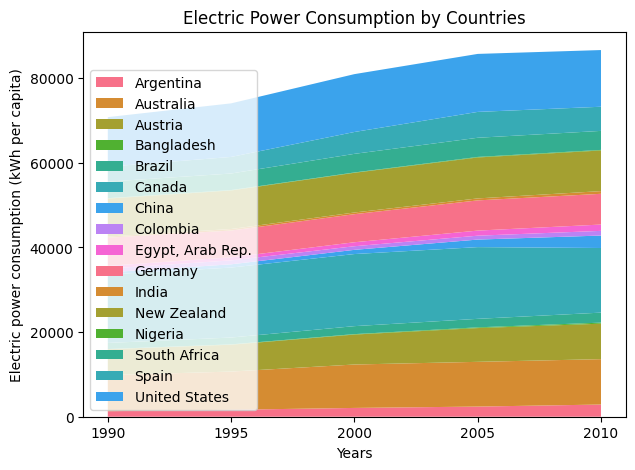

In [133]:
dfEnergyC = pd.melt(dfEnergy,id_vars=['Country Name','Indicator Name','Region'],value_vars=[str(x) for x in range(1990,2015,5)])
dfEnergyC = dfEnergyC.groupby(['Country Name','variable'])['value'].sum().reset_index()
EnergyPivot = dfEnergyC.pivot_table(index='Country Name',columns='variable',values='value')

plt.figure(figsize=(7,5))

years = EnergyPivot.columns
values = EnergyPivot.values
pallete = sns.color_palette('husl', 9)

plt.stackplot(years, values, labels=EnergyPivot.index, colors=pallete)

plt.xlabel('Years')
plt.ylabel('Electric power consumption (kWh per capita)')
plt.title('Electric Power Consumption by Countries')
plt.legend(loc='lower left')
# plt.savefig('powerconsumption.png',bbox_inches='tight')
plt.show()

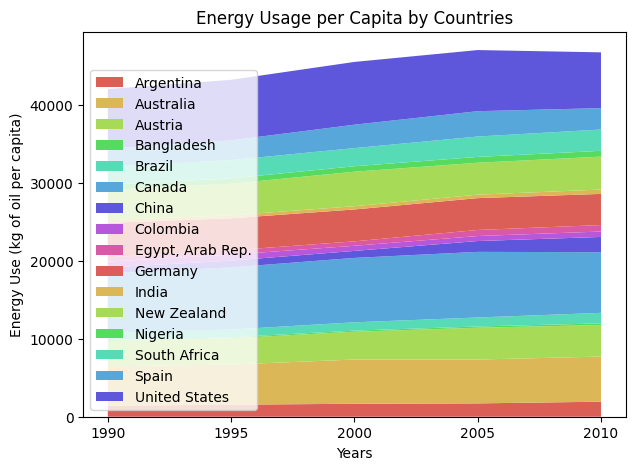

In [134]:
dfEnergyC = pd.melt(dfenergyoil,id_vars=['Country Name','Indicator Name','Region'],value_vars=[str(x) for x in range(1990,2015,5)])
dfEnergyC = dfEnergyC.groupby(['Country Name','variable'])['value'].sum().reset_index()
EnergyPivot = dfEnergyC.pivot_table(index='Country Name',columns='variable',values='value')

plt.figure(figsize=(7,5))

years = EnergyPivot.columns
values = EnergyPivot.values
pallete = sns.color_palette('hls', 9)

plt.stackplot(years, values, labels=EnergyPivot.index, colors=pallete)

plt.xlabel('Years')
plt.ylabel('Energy Use (kg of oil per capita)')
plt.title('Energy Usage per Capita by Countries')
plt.legend(loc='lower left')
# plt.savefig('energyuse.png',bbox_inches='tight')
plt.show()

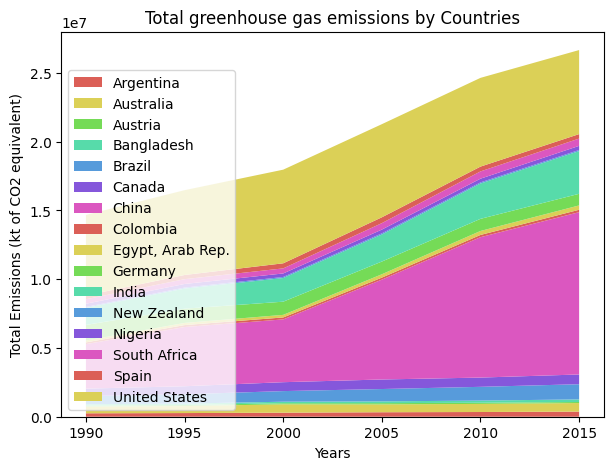

In [128]:
dfGHG = pd.melt(dfgreenhouse,id_vars=['Country Name','Indicator Name','Region'],value_vars=[str(x) for x in range(1990,2016,5)])
dfGHG = dfGHG.groupby(['Country Name','variable'])['value'].sum().reset_index()
GHGPivot = dfGHG.pivot_table(index='Country Name',columns='variable',values='value')

plt.figure(figsize=(7,5))

years = GHGPivot.columns
values = GHGPivot.values

pallete = sns.color_palette('hls', 7)

plt.stackplot(years, values, labels=EnergyPivot.index, colors=pallete)

plt.xlabel('Years')
plt.ylabel('Total Emissions (kt of CO2 equivalent)')
plt.title('Total greenhouse gas emissions by Countries')
plt.legend(loc='lower left')
plt.savefig('greenhouse.png',bbox_inches='tight')
plt.show()
